In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt
import re
%matplotlib inline

# Original Naive Bayes code
##### Student name: Yang Liying
##### Student ID: 2109853M-IM20-0015
##### This code includes original Naive Bayes and the-bag-of-word.(Question1)

In [2]:
def preprocess(paragraph):
    result=re.sub('[^a-z\s]+',' ',paragraph,flags=re.IGNORECASE) 
    result=re.sub('(\s+)',' ',result) 
    result=result.lower() 
    result=result.strip()
    return result 

## Original Naive Bayes

In [3]:
class NaiveBayes:
    def __init__(self, each_classes):
        self.classes = each_classes  
        self.bow_dicts = np.array([defaultdict(lambda: 0) for idx in range(self.classes.shape[0])])

    def BoW(self, words, index):
        if isinstance(words, np.ndarray): words = words[0]
        for word in words.split():  
            self.bow_dicts[index][word] += 1

    def DealBoW(self):
        # constructing BoW for each category
        for word_idx, word in enumerate(self.classes):
            all_word = self.data[self.labels == word]  

            result = [preprocess(item) for item in all_word]
            result = pd.DataFrame(data=result)

            # now costruct BoW of this particular category
            np.apply_along_axis(self.BoW, 1, result, word_idx)
        category = np.empty(self.classes.shape[0])
        word_count = np.empty(self.classes.shape[0])
        return category, word_count

    def Train(self, dataset, labels):
        self.data = dataset
        self.labels = labels

        if not isinstance(self.data, np.ndarray): self.data = np.array(self.data)
        if not isinstance(self.labels, np.ndarray): self.labels = np.array(self.labels)
        all_words = []
        category, word_count = self.DealBoW()
        for wordidx, word in enumerate(tqdm(self.classes, desc='Calculate probability for each category')):
            # Calculating prior probability p(c) for each category
            category[wordidx] = np.sum(self.labels == word) / float(self.labels.shape[0])

            #count = list(self.bow_dicts[wordidx].values())
            word_count[wordidx] = np.sum(
                np.array(list(self.bow_dicts[wordidx].values()))) + 1  # |v| is remaining to be added

            # get all words of this category
            all_words += self.bow_dicts[wordidx].keys()

        self.vocabulary = np.unique(np.array(all_words))
        self.vocab_size = self.vocabulary.shape[0]

        # computing denominator value
        denoms = np.array(
            [word_count[wordidx] + self.vocab_size + 1 for wordidx, word in enumerate(self.classes)])
        self.word_info = [(self.bow_dicts[wordidx], category[wordidx], denoms[wordidx]) for wordidx, word in
                          enumerate(self.classes)]
        self.word_info = np.array(self.word_info)

    def findprobablity(self, data, prob):
        for category_idx, category in tqdm(enumerate(self.classes), desc='Calculate word probability:'):
            for test_token in data.split():  
                # for each word w [ count(w|c)+1 ] / [ count(c) + |V| + 1 ]
                # get total count 
                test_token_counts = self.word_info[category_idx][0].get(test_token, 0) + 1
                test_token_prob = test_token_counts / float(self.word_info[category_idx][2])
                prob[category_idx] += np.log(test_token_prob)
        return

    def wordprob(self, data):
        prob = np.zeros(self.classes.shape[0])  
        self.findprobablity(data, prob)
        post_prob = np.empty(self.classes.shape[0])
        for categoryidx, category in enumerate(self.classes):
            post_prob[categoryidx] = prob[categoryidx] + np.log(self.word_info[categoryidx][1])
        return post_prob

    def Test(self, test_set):
        predictions = []  
        for data in tqdm(test_set, desc='Test:'):
            result = preprocess(data)
            post_prob = self.wordprob(result)  
            predictions.append(self.classes[np.argmax(post_prob)])

        return np.array(predictions)

In [4]:
newsgroups_train = fetch_20newsgroups(subset='train')
train_data = newsgroups_train.data  # getting all trainign examples
train_labels = newsgroups_train.target

In [6]:
len(train_data)

11314

In [7]:
len(train_labels)

11314

In [8]:
newsgroups_test = fetch_20newsgroups(subset='test')  # loading test data
test_data = newsgroups_test.data  # get test set examples
test_labels = newsgroups_test.target

In [9]:
len(test_data)

7532

In [10]:
len(test_labels)

7532

In [11]:
initialNB = NaiveBayes(np.unique(train_labels))

In [12]:
initialNB.Train(train_data, train_labels)

Calculate probability for each category: 100%|██████████| 20/20 [00:00<00:00, 1055.38it/s]


In [13]:
prediction = initialNB.Test(test_data)

Test::   0%|          | 0/7532 [00:00<?, ?it/s]
Calculate word probability:: 20it [00:00, 4006.98it/s]

Calculate word probability:: 20it [00:00, 4011.00it/s]

Calculate word probability:: 20it [00:00, 6683.62it/s]

Calculate word probability:: 20it [00:00, 572.92it/s]

Calculate word probability:: 20it [00:00, 3342.87it/s]

Calculate word probability:: 20it [00:00, 668.46it/s]

Calculate word probability:: 20it [00:00, 20049.25it/s]
Test::   0%|          | 7/7532 [00:00<01:48, 69.49it/s]
Calculate word probability:: 20it [00:00, 5013.81it/s]

Calculate word probability:: 20it [00:00, 6689.48it/s]

Calculate word probability:: 20it [00:00, 4011.38it/s]

Calculate word probability:: 20it [00:00, 5014.41it/s]

Calculate word probability:: 20it [00:00, 4011.58it/s]

Calculate word probability:: 20it [00:00, 1670.97it/s]

Calculate word probability:: 20it [00:00, 3341.28it/s]

Calculate word probability:: 20it [00:00, 626.67it/s]

Calculate word probability:: 20it [00:00, 1336.87it/s]
Test

Calculate word probability:: 20it [00:00, 3341.81it/s]

Calculate word probability:: 20it [00:00, 290.64it/s]

Calculate word probability:: 20it [00:00, 323.45it/s]

Calculate word probability:: 20it [00:00, 2506.76it/s]

Calculate word probability:: 20it [00:00, 5014.41it/s]

Calculate word probability:: 20it [00:00, 2507.06it/s]

Calculate word probability:: 20it [00:00, 2506.76it/s]
Test::   4%|▎         | 272/7532 [00:03<01:40, 71.99it/s]
Calculate word probability:: 20it [00:00, 1055.44it/s]

Calculate word probability:: 20it [00:00, 6692.68it/s]

Calculate word probability:: 20it [00:00, 5013.21it/s]

Calculate word probability:: 20it [00:00, 3342.61it/s]

Calculate word probability:: 20it [00:00, 2008.29it/s]

Calculate word probability:: 20it [00:00, 6698.56it/s]

Calculate word probability:: 20it [00:00, 2506.91it/s]

Calculate word probability:: 20it [00:00, 4011.77it/s]

Calculate word probability:: 20it [00:00, 2005.36it/s]

Calculate word probability:: 20it [00:00, 2865.26

Calculate word probability:: 20it [00:00, 2864.67it/s]
Test::   7%|▋         | 531/7532 [00:06<01:17, 90.32it/s]
Calculate word probability:: 20it [00:00, 3342.47it/s]

Calculate word probability:: 20it [00:00, 2227.87it/s]

Calculate word probability:: 20it [00:00, 501.35it/s]

Calculate word probability:: 20it [00:00, 3341.94it/s]

Calculate word probability:: 20it [00:00, 2864.47it/s]

Calculate word probability:: 20it [00:00, 2506.46it/s]

Calculate word probability:: 20it [00:00, 3342.61it/s]

Calculate word probability:: 20it [00:00, 4010.81it/s]

Calculate word probability:: 20it [00:00, 10021.03it/s]

Calculate word probability:: 20it [00:00, 6682.55it/s]
Test::   7%|▋         | 541/7532 [00:06<01:19, 88.40it/s]
Calculate word probability:: 20it [00:00, 1822.98it/s]

Calculate word probability:: 20it [00:00, 4011.77it/s]

Calculate word probability:: 20it [00:00, 2506.61it/s]

Calculate word probability:: 20it [00:00, 1542.65it/s]

Calculate word probability:: 20it [00:00, 6684

Calculate word probability:: 20it [00:00, 1542.51it/s]

Calculate word probability:: 20it [00:00, 2506.91it/s]
Test::  11%|█         | 797/7532 [00:09<01:11, 93.66it/s]
Calculate word probability:: 20it [00:00, 6683.62it/s]

Calculate word probability:: 20it [00:00, 10022.23it/s]

Calculate word probability:: 20it [00:00, 6684.15it/s]

Calculate word probability:: 20it [00:00, 5012.61it/s]

Calculate word probability:: 20it [00:00, 1179.63it/s]

Calculate word probability:: 20it [00:00, 4010.23it/s]

Calculate word probability:: 20it [00:00, 2869.86it/s]

Calculate word probability:: 20it [00:00, 2000.14it/s]

Calculate word probability:: 20it [00:00, 2228.17it/s]

Calculate word probability:: 20it [00:00, 5012.91it/s]

Calculate word probability:: 20it [00:00, 1542.59it/s]
Test::  11%|█         | 808/7532 [00:09<01:09, 96.87it/s]
Calculate word probability:: 20it [00:00, 557.03it/s]

Calculate word probability:: 20it [00:00, 1671.14it/s]

Calculate word probability:: 20it [00:00, 871.

Calculate word probability:: 20it [00:00, 2864.28it/s]

Calculate word probability:: 20it [00:00, 668.44it/s]

Calculate word probability:: 20it [00:00, 3983.76it/s]

Calculate word probability:: 20it [00:00, 2864.67it/s]

Calculate word probability:: 20it [00:00, 3341.28it/s]

Calculate word probability:: 20it [00:00, 1671.10it/s]

Calculate word probability:: 20it [00:00, 2228.17it/s]

Calculate word probability:: 20it [00:00, 1823.02it/s]
Test::  14%|█▍        | 1061/7532 [00:13<02:01, 53.07it/s]
Calculate word probability:: 20it [00:00, 2005.17it/s]

Calculate word probability:: 20it [00:00, 1002.69it/s]

Calculate word probability:: 20it [00:00, 668.84it/s]

Calculate word probability:: 20it [00:00, 1823.02it/s]

Calculate word probability:: 20it [00:00, 1542.59it/s]

Calculate word probability:: 20it [00:00, 2506.23it/s]

Calculate word probability:: 20it [00:00, 1055.52it/s]
Test::  14%|█▍        | 1068/7532 [00:13<02:00, 53.50it/s]
Calculate word probability:: 20it [00:00, 1002

Calculate word probability:: 20it [00:00, 5012.61it/s]

Calculate word probability:: 20it [00:00, 6687.88it/s]

Calculate word probability:: 20it [00:00, 1432.51it/s]

Calculate word probability:: 20it [00:00, 4006.40it/s]

Calculate word probability:: 20it [00:00, 2866.14it/s]

Calculate word probability:: 20it [00:00, 2510.73it/s]
Test::  17%|█▋        | 1318/7532 [00:17<01:12, 85.46it/s]
Calculate word probability:: 20it [00:00, 2865.16it/s]

Calculate word probability:: 20it [00:00, 5036.09it/s]

Calculate word probability:: 20it [00:00, 1823.17it/s]

Calculate word probability:: 20it [00:00, 2005.50it/s]

Calculate word probability:: 20it [00:00, 1055.82it/s]

Calculate word probability:: 20it [00:00, 4010.23it/s]

Calculate word probability:: 20it [00:00, 4011.38it/s]

Calculate word probability:: 20it [00:00, 3342.61it/s]

Calculate word probability:: 20it [00:00, 2865.35it/s]
Test::  18%|█▊        | 1327/7532 [00:17<01:11, 86.51it/s]
Calculate word probability:: 20it [00:00, 50

Calculate word probability:: 20it [00:00, 4011.00it/s]

Calculate word probability:: 20it [00:00, 5011.71it/s]

Calculate word probability:: 20it [00:00, 2868.68it/s]
Test::  21%|██        | 1579/7532 [00:20<00:52, 112.43it/s]
Calculate word probability:: 20it [00:00, 3342.87it/s]

Calculate word probability:: 20it [00:00, 4010.43it/s]

Calculate word probability:: 20it [00:00, 2860.18it/s]

Calculate word probability:: 20it [00:00, 5013.21it/s]

Calculate word probability:: 20it [00:00, 1671.14it/s]

Calculate word probability:: 20it [00:00, 6685.22it/s]

Calculate word probability:: 20it [00:00, 1055.46it/s]

Calculate word probability:: 20it [00:00, 5015.91it/s]

Calculate word probability:: 20it [00:00, 1822.86it/s]

Calculate word probability:: 20it [00:00, 10024.63it/s]

Calculate word probability:: 20it [00:00, 1336.87it/s]

Calculate word probability:: 20it [00:00, 1542.70it/s]
Test::  21%|██        | 1591/7532 [00:20<00:56, 106.06it/s]
Calculate word probability:: 20it [00:00,

Calculate word probability:: 20it [00:00, 4010.23it/s]

Calculate word probability:: 20it [00:00, 4015.99it/s]

Calculate word probability:: 20it [00:00, 2863.98it/s]

Calculate word probability:: 20it [00:00, 4013.11it/s]

Calculate word probability:: 20it [00:00, 1432.41it/s]

Calculate word probability:: 20it [00:00, 20034.89it/s]

Calculate word probability:: 20it [00:00, 10028.22it/s]

Calculate word probability:: 20it [00:00, 3345.14it/s]

Calculate word probability:: 20it [00:00, 1822.70it/s]

Calculate word probability:: 20it [00:00, 691.48it/s]
Test::  23%|██▎       | 1717/7532 [00:21<01:24, 69.21it/s]
Calculate word probability:: 20it [00:00, 10012.66it/s]

Calculate word probability:: 20it [00:00, 1823.02it/s]

Calculate word probability:: 20it [00:00, 4011.00it/s]

Calculate word probability:: 20it [00:00, 2864.57it/s]

Calculate word probability:: 20it [00:00, 4011.19it/s]

Calculate word probability:: 20it [00:00, 6685.22it/s]

Calculate word probability:: 20it [00:00, 12

Calculate word probability:: 20it [00:00, 10022.23it/s]

Calculate word probability:: 20it [00:00, 6693.22it/s]

Calculate word probability:: 20it [00:00, 3342.07it/s]

Calculate word probability:: 20it [00:00, 2004.49it/s]

Calculate word probability:: 20it [00:00, 2005.64it/s]

Calculate word probability:: 20it [00:00, 1822.90it/s]

Calculate word probability:: 20it [00:00, 1822.86it/s]

Calculate word probability:: 20it [00:00, 2005.17it/s]

Calculate word probability:: 20it [00:00, 10035.42it/s]

Calculate word probability:: 20it [00:00, 1542.48it/s]
Test::  26%|██▋       | 1980/7532 [00:25<01:05, 85.29it/s]
Calculate word probability:: 20it [00:00, 10022.23it/s]

Calculate word probability:: 20it [00:00, 1113.94it/s]

Calculate word probability:: 20it [00:00, 2506.83it/s]

Calculate word probability:: 20it [00:00, 1822.86it/s]

Calculate word probability:: 20it [00:00, 1114.16it/s]

Calculate word probability:: 20it [00:00, 1671.07it/s]

Calculate word probability:: 20it [00:00, 2

Calculate word probability:: 8it [00:00, 78.64it/s]
Calculate word probability:: 20it [00:00, 72.92it/s]
Test::  30%|██▉       | 2226/7532 [00:30<01:43, 51.42it/s]
Calculate word probability:: 20it [00:00, 572.96it/s]

Calculate word probability:: 20it [00:00, 3342.21it/s]

Calculate word probability:: 20it [00:00, 1823.69it/s]

Calculate word probability:: 20it [00:00, 20030.11it/s]

Calculate word probability:: 20it [00:00, 5013.81it/s]

Calculate word probability:: 20it [00:00, 911.57it/s]

Calculate word probability:: 20it [00:00, 1823.25it/s]
Test::  30%|██▉       | 2233/7532 [00:30<01:37, 54.29it/s]
Calculate word probability:: 20it [00:00, 401.07it/s]

Calculate word probability:: 20it [00:00, 2506.46it/s]

Calculate word probability:: 20it [00:00, 1253.40it/s]

Calculate word probability:: 20it [00:00, 5012.31it/s]

Calculate word probability:: 20it [00:00, 4010.23it/s]

Calculate word probability:: 20it [00:00, 2864.77it/s]

Calculate word probability:: 20it [00:00, 2227.99it/

Calculate word probability:: 20it [00:00, 1822.86it/s]

Calculate word probability:: 20it [00:00, 5012.61it/s]

Calculate word probability:: 20it [00:00, 3342.61it/s]

Calculate word probability:: 20it [00:00, 3342.74it/s]

Calculate word probability:: 20it [00:00, 5009.32it/s]

Calculate word probability:: 20it [00:00, 6684.15it/s]

Calculate word probability:: 20it [00:00, 691.48it/s]
Test::  33%|███▎      | 2491/7532 [00:33<01:11, 70.44it/s]
Calculate word probability:: 20it [00:00, 3341.81it/s]

Calculate word probability:: 20it [00:00, 1542.62it/s]

Calculate word probability:: 20it [00:00, 1253.47it/s]

Calculate word probability:: 20it [00:00, 2228.94it/s]

Calculate word probability:: 20it [00:00, 3342.61it/s]

Calculate word probability:: 20it [00:00, 4010.81it/s]

Calculate word probability:: 20it [00:00, 2863.98it/s]

Calculate word probability:: 20it [00:00, 2005.40it/s]

Calculate word probability:: 20it [00:00, 1826.03it/s]

Calculate word probability:: 20it [00:00, 1114.

Calculate word probability:: 20it [00:00, 3352.89it/s]

Calculate word probability:: 20it [00:00, 4010.23it/s]

Calculate word probability:: 20it [00:00, 2228.05it/s]

Calculate word probability:: 20it [00:00, 2005.17it/s]

Calculate word probability:: 20it [00:00, 771.25it/s]

Calculate word probability:: 20it [00:00, 1002.68it/s]

Calculate word probability:: 20it [00:00, 4010.04it/s]
Test::  37%|███▋      | 2753/7532 [00:36<00:50, 94.02it/s]
Calculate word probability:: 20it [00:00, 3341.41it/s]

Calculate word probability:: 20it [00:00, 5014.41it/s]

Calculate word probability:: 20it [00:00, 2506.23it/s]

Calculate word probability:: 20it [00:00, 10023.43it/s]

Calculate word probability:: 20it [00:00, 1432.36it/s]

Calculate word probability:: 20it [00:00, 318.31it/s]

Calculate word probability:: 20it [00:00, 2227.81it/s]

Calculate word probability:: 20it [00:00, 954.92it/s]

Calculate word probability:: 20it [00:00, 1671.17it/s]

Calculate word probability:: 20it [00:00, 4010.6

Calculate word probability:: 20it [00:00, 3342.34it/s]

Calculate word probability:: 20it [00:00, 4006.40it/s]

Calculate word probability:: 20it [00:00, 1544.07it/s]

Calculate word probability:: 20it [00:00, 2227.87it/s]

Calculate word probability:: 20it [00:00, 10028.22it/s]

Calculate word probability:: 20it [00:00, 607.70it/s]
Test::  40%|███▉      | 3012/7532 [00:41<01:10, 64.34it/s]
Calculate word probability:: 20it [00:00, 10145.87it/s]

Calculate word probability:: 20it [00:00, 3352.49it/s]

Calculate word probability:: 20it [00:00, 10027.02it/s]

Calculate word probability:: 20it [00:00, 6681.49it/s]

Calculate word probability:: 20it [00:00, 2864.96it/s]

Calculate word probability:: 20it [00:00, 5013.81it/s]

Calculate word probability:: 20it [00:00, 1671.37it/s]

Calculate word probability:: 20it [00:00, 6683.08it/s]

Calculate word probability:: 20it [00:00, 4011.00it/s]

Calculate word probability:: 20it [00:00, 5014.11it/s]

Calculate word probability:: 20it [00:00, 28

Calculate word probability:: 20it [00:00, 1671.07it/s]

Calculate word probability:: 20it [00:00, 4010.62it/s]
Test::  43%|████▎     | 3274/7532 [00:43<00:40, 106.04it/s]
Calculate word probability:: 20it [00:00, 4012.34it/s]

Calculate word probability:: 20it [00:00, 5013.51it/s]

Calculate word probability:: 20it [00:00, 2005.31it/s]

Calculate word probability:: 20it [00:00, 1822.98it/s]

Calculate word probability:: 20it [00:00, 2871.93it/s]

Calculate word probability:: 20it [00:00, 1002.65it/s]

Calculate word probability:: 20it [00:00, 2005.45it/s]

Calculate word probability:: 20it [00:00, 2228.23it/s]

Calculate word probability:: 20it [00:00, 2864.86it/s]

Calculate word probability:: 0it [00:00, ?it/s]
Calculate word probability:: 20it [00:00, 172.90it/s]

Calculate word probability:: 20it [00:00, 9900.40it/s]
Test::  44%|████▎     | 3285/7532 [00:44<00:54, 78.38it/s] 
Calculate word probability:: 20it [00:00, 3342.74it/s]

Calculate word probability:: 20it [00:00, 1671.14it

Calculate word probability:: 20it [00:00, 4011.00it/s]

Calculate word probability:: 20it [00:00, 10152.01it/s]
Test::  47%|████▋     | 3538/7532 [00:46<00:48, 82.20it/s]
Calculate word probability:: 20it [00:00, 541.37it/s]

Calculate word probability:: 20it [00:00, 691.50it/s]

Calculate word probability:: 20it [00:00, 3342.34it/s]

Calculate word probability:: 20it [00:00, 10024.63it/s]

Calculate word probability:: 20it [00:00, 6684.15it/s]

Calculate word probability:: 20it [00:00, 4022.93it/s]

Calculate word probability:: 20it [00:00, 2228.35it/s]

Calculate word probability:: 20it [00:00, 3342.21it/s]

Calculate word probability:: 20it [00:00, 2506.61it/s]
Test::  47%|████▋     | 3547/7532 [00:47<00:50, 78.25it/s]
Calculate word probability:: 20it [00:00, 2007.32it/s]

Calculate word probability:: 20it [00:00, 1179.88it/s]

Calculate word probability:: 20it [00:00, 5013.81it/s]

Calculate word probability:: 20it [00:00, 6685.22it/s]

Calculate word probability:: 20it [00:00, 33

Calculate word probability:: 20it [00:00, 5013.81it/s]

Calculate word probability:: 20it [00:00, 2506.91it/s]

Calculate word probability:: 20it [00:00, 4009.66it/s]

Calculate word probability:: 20it [00:00, 3342.61it/s]

Calculate word probability:: 20it [00:00, 4010.43it/s]

Calculate word probability:: 20it [00:00, 1114.04it/s]

Calculate word probability:: 20it [00:00, 4011.00it/s]

Calculate word probability:: 20it [00:00, 5009.92it/s]

Calculate word probability:: 20it [00:00, 2864.67it/s]

Calculate word probability:: 20it [00:00, 5012.61it/s]

Calculate word probability:: 20it [00:00, 4011.19it/s]

Calculate word probability:: 20it [00:00, 3992.86it/s]
Test::  51%|█████     | 3809/7532 [00:50<00:40, 92.44it/s]
Calculate word probability:: 20it [00:00, 4010.81it/s]

Calculate word probability:: 20it [00:00, 4011.38it/s]

Calculate word probability:: 20it [00:00, 2228.11it/s]

Calculate word probability:: 20it [00:00, 771.28it/s]

Calculate word probability:: 20it [00:00, 5038.

Calculate word probability:: 20it [00:00, 1432.43it/s]

Calculate word probability:: 20it [00:00, 527.73it/s]

Calculate word probability:: 20it [00:00, 3992.86it/s]

Calculate word probability:: 20it [00:00, 2864.96it/s]
Test::  54%|█████▍    | 4063/7532 [00:53<00:43, 78.90it/s]
Calculate word probability:: 20it [00:00, 6726.49it/s]

Calculate word probability:: 0it [00:00, ?it/s]
Calculate word probability:: 20it [00:00, 180.66it/s]

Calculate word probability:: 20it [00:00, 6686.28it/s]

Calculate word probability:: 20it [00:00, 4006.40it/s]

Calculate word probability:: 20it [00:00, 2864.86it/s]

Calculate word probability:: 20it [00:00, 10018.64it/s]

Calculate word probability:: 20it [00:00, 1542.62it/s]

Calculate word probability:: 20it [00:00, 1673.20it/s]

Calculate word probability:: 20it [00:00, 6686.28it/s]
Test::  54%|█████▍    | 4072/7532 [00:53<00:51, 67.68it/s]
Calculate word probability:: 20it [00:00, 4010.81it/s]

Calculate word probability:: 20it [00:00, 10097.02it/

Calculate word probability:: 20it [00:00, 6685.22it/s]

Calculate word probability:: 20it [00:00, 2228.11it/s]

Calculate word probability:: 20it [00:00, 1337.68it/s]

Calculate word probability:: 20it [00:00, 1432.53it/s]
Test::  57%|█████▋    | 4325/7532 [00:56<00:31, 100.96it/s]
Calculate word probability:: 20it [00:00, 5014.41it/s]

Calculate word probability:: 20it [00:00, 2865.16it/s]

Calculate word probability:: 20it [00:00, 1179.73it/s]

Calculate word probability:: 20it [00:00, 2507.28it/s]

Calculate word probability:: 20it [00:00, 1432.51it/s]

Calculate word probability:: 20it [00:00, 3341.68it/s]

Calculate word probability:: 20it [00:00, 2865.16it/s]

Calculate word probability:: 20it [00:00, 5013.81it/s]

Calculate word probability:: 20it [00:00, 20126.22it/s]

Calculate word probability:: 20it [00:00, 1432.51it/s]

Calculate word probability:: 20it [00:00, 2507.28it/s]
Test::  58%|█████▊    | 4336/7532 [00:57<00:32, 99.62it/s] 
Calculate word probability:: 20it [00:00,

Calculate word probability:: 20it [00:00, 5013.81it/s]

Calculate word probability:: 20it [00:00, 1054.31it/s]

Calculate word probability:: 20it [00:00, 2865.06it/s]

Calculate word probability:: 20it [00:00, 2228.23it/s]
Test::  61%|██████    | 4588/7532 [01:00<00:30, 95.46it/s]
Calculate word probability:: 20it [00:00, 4012.54it/s]

Calculate word probability:: 20it [00:00, 1432.43it/s]

Calculate word probability:: 20it [00:00, 2506.91it/s]

Calculate word probability:: 20it [00:00, 2229.77it/s]

Calculate word probability:: 20it [00:00, 10031.82it/s]

Calculate word probability:: 20it [00:00, 2226.22it/s]

Calculate word probability:: 20it [00:00, 10029.42it/s]

Calculate word probability:: 20it [00:00, 5013.81it/s]

Calculate word probability:: 20it [00:00, 4010.81it/s]

Calculate word probability:: 20it [00:00, 5012.61it/s]

Calculate word probability:: 20it [00:00, 6683.62it/s]

Calculate word probability:: 20it [00:00, 1432.41it/s]
Test::  61%|██████    | 4600/7532 [01:00<00:2

Test::  64%|██████▍   | 4850/7532 [01:03<00:28, 92.73it/s]
Calculate word probability:: 20it [00:00, 1823.17it/s]

Calculate word probability:: 20it [00:00, 2864.86it/s]

Calculate word probability:: 20it [00:00, 4010.04it/s]

Calculate word probability:: 20it [00:00, 2507.13it/s]

Calculate word probability:: 20it [00:00, 4011.00it/s]

Calculate word probability:: 20it [00:00, 2228.41it/s]

Calculate word probability:: 20it [00:00, 2507.13it/s]

Calculate word probability:: 20it [00:00, 5013.51it/s]

Calculate word probability:: 20it [00:00, 5014.11it/s]

Calculate word probability:: 20it [00:00, 1179.68it/s]

Calculate word probability:: 20it [00:00, 3342.47it/s]
Test::  65%|██████▍   | 4861/7532 [01:03<00:28, 95.06it/s]
Calculate word probability:: 20it [00:00, 2005.55it/s]

Calculate word probability:: 20it [00:00, 3352.49it/s]

Calculate word probability:: 20it [00:00, 2228.35it/s]

Calculate word probability:: 20it [00:00, 1671.17it/s]

Calculate word probability:: 20it [00:00, 1

Calculate word probability:: 20it [00:00, 3991.91it/s]

Calculate word probability:: 20it [00:00, 4004.11it/s]

Calculate word probability:: 20it [00:00, 2000.72it/s]

Calculate word probability:: 20it [00:00, 2507.13it/s]

Calculate word probability:: 20it [00:00, 2870.84it/s]

Calculate word probability:: 20it [00:00, 1671.10it/s]

Calculate word probability:: 20it [00:00, 1542.65it/s]

Calculate word probability:: 20it [00:00, 3342.61it/s]

Calculate word probability:: 20it [00:00, 5013.51it/s]
Test::  68%|██████▊   | 5120/7532 [01:06<00:23, 102.32it/s]
Calculate word probability:: 20it [00:00, 3342.07it/s]

Calculate word probability:: 20it [00:00, 2506.98it/s]

Calculate word probability:: 20it [00:00, 4985.50it/s]

Calculate word probability:: 20it [00:00, 1823.41it/s]

Calculate word probability:: 20it [00:00, 10027.02it/s]

Calculate word probability:: 20it [00:00, 6704.45it/s]

Calculate word probability:: 20it [00:00, 5034.27it/s]

Calculate word probability:: 20it [00:00, 39

Calculate word probability:: 20it [00:00, 6683.08it/s]

Calculate word probability:: 20it [00:00, 10021.03it/s]

Calculate word probability:: 20it [00:00, 4011.19it/s]

Calculate word probability:: 20it [00:00, 1818.87it/s]

Calculate word probability:: 20it [00:00, 2864.86it/s]
Test::  71%|███████▏  | 5379/7532 [01:09<00:19, 107.66it/s]
Calculate word probability:: 20it [00:00, 4009.85it/s]

Calculate word probability:: 20it [00:00, 20034.89it/s]

Calculate word probability:: 20it [00:00, 1823.06it/s]

Calculate word probability:: 20it [00:00, 6685.75it/s]

Calculate word probability:: 20it [00:00, 5013.21it/s]

Calculate word probability:: 20it [00:00, 2506.91it/s]

Calculate word probability:: 20it [00:00, 1432.41it/s]

Calculate word probability:: 20it [00:00, 2012.57it/s]

Calculate word probability:: 20it [00:00, 1253.34it/s]

Calculate word probability:: 20it [00:00, 3342.21it/s]

Calculate word probability:: 20it [00:00, 2006.32it/s]

Calculate word probability:: 20it [00:00, 4

Test::  75%|███████▍  | 5640/7532 [01:12<00:20, 91.55it/s]
Calculate word probability:: 20it [00:00, 2005.21it/s]

Calculate word probability:: 20it [00:00, 501.34it/s]

Calculate word probability:: 20it [00:00, 1671.20it/s]

Calculate word probability:: 20it [00:00, 871.89it/s]

Calculate word probability:: 20it [00:00, 2227.99it/s]

Calculate word probability:: 20it [00:00, 2864.47it/s]

Calculate word probability:: 20it [00:00, 1336.94it/s]

Calculate word probability:: 20it [00:00, 4011.38it/s]

Calculate word probability:: 20it [00:00, 2005.50it/s]

Calculate word probability:: 20it [00:00, 2864.86it/s]
Test::  75%|███████▌  | 5650/7532 [01:12<00:23, 80.39it/s]
Calculate word probability:: 20it [00:00, 3342.21it/s]

Calculate word probability:: 20it [00:00, 6684.15it/s]

Calculate word probability:: 20it [00:00, 2864.47it/s]

Calculate word probability:: 20it [00:00, 10028.22it/s]

Calculate word probability:: 20it [00:00, 800.94it/s]

Calculate word probability:: 20it [00:00, 167

Calculate word probability:: 20it [00:00, 2229.23it/s]
Test::  77%|███████▋  | 5774/7532 [01:14<00:17, 99.61it/s]
Calculate word probability:: 20it [00:00, 4010.62it/s]

Calculate word probability:: 20it [00:00, 2005.31it/s]

Calculate word probability:: 20it [00:00, 2228.35it/s]

Calculate word probability:: 20it [00:00, 1671.17it/s]

Calculate word probability:: 20it [00:00, 10025.83it/s]

Calculate word probability:: 20it [00:00, 1671.07it/s]

Calculate word probability:: 20it [00:00, 4011.19it/s]

Calculate word probability:: 20it [00:00, 4010.23it/s]

Calculate word probability:: 20it [00:00, 2005.21it/s]

Calculate word probability:: 20it [00:00, 5013.81it/s]

Calculate word probability:: 20it [00:00, 1432.36it/s]
Test::  77%|███████▋  | 5785/7532 [01:14<00:17, 99.00it/s]
Calculate word probability:: 20it [00:00, 2865.16it/s]

Calculate word probability:: 20it [00:00, 4012.73it/s]

Calculate word probability:: 20it [00:00, 3343.01it/s]

Calculate word probability:: 20it [00:00, 1

Calculate word probability:: 20it [00:00, 4025.24it/s]

Calculate word probability:: 20it [00:00, 4011.00it/s]

Calculate word probability:: 20it [00:00, 4010.81it/s]

Calculate word probability:: 20it [00:00, 5013.81it/s]

Calculate word probability:: 20it [00:00, 1544.72it/s]

Calculate word probability:: 20it [00:00, 2865.16it/s]
Test::  80%|████████  | 6044/7532 [01:17<00:17, 87.51it/s]
Calculate word probability:: 20it [00:00, 2236.66it/s]

Calculate word probability:: 20it [00:00, 2506.98it/s]

Calculate word probability:: 20it [00:00, 4011.00it/s]

Calculate word probability:: 20it [00:00, 2507.28it/s]

Calculate word probability:: 20it [00:00, 5035.48it/s]

Calculate word probability:: 20it [00:00, 3343.14it/s]

Calculate word probability:: 20it [00:00, 1432.51it/s]

Calculate word probability:: 20it [00:00, 1545.69it/s]

Calculate word probability:: 20it [00:00, 2506.91it/s]

Calculate word probability:: 20it [00:00, 10028.22it/s]

Calculate word probability:: 20it [00:00, 501

Calculate word probability:: 20it [00:00, 2228.88it/s]

Calculate word probability:: 20it [00:00, 3998.00it/s]
Test::  84%|████████▎ | 6301/7532 [01:21<00:18, 65.33it/s]
Calculate word probability:: 20it [00:00, 6686.81it/s]

Calculate word probability:: 20it [00:00, 4011.00it/s]

Calculate word probability:: 20it [00:00, 1671.17it/s]

Calculate word probability:: 20it [00:00, 1825.20it/s]

Calculate word probability:: 20it [00:00, 5002.45it/s]

Calculate word probability:: 20it [00:00, 10029.42it/s]

Calculate word probability:: 20it [00:00, 3342.21it/s]

Calculate word probability:: 20it [00:00, 3342.07it/s]

Calculate word probability:: 20it [00:00, 1826.55it/s]

Calculate word probability:: 20it [00:00, 2865.26it/s]

Calculate word probability:: 20it [00:00, 4005.64it/s]

Calculate word probability:: 20it [00:00, 2506.98it/s]
Test::  84%|████████▍ | 6313/7532 [01:21<00:16, 75.93it/s]
Calculate word probability:: 20it [00:00, 2867.41it/s]

Calculate word probability:: 20it [00:00, 4

Calculate word probability:: 20it [00:00, 6683.08it/s]

Calculate word probability:: 20it [00:00, 5012.91it/s]

Calculate word probability:: 20it [00:00, 4010.43it/s]

Calculate word probability:: 20it [00:00, 9994.77it/s]

Calculate word probability:: 20it [00:00, 5013.21it/s]

Calculate word probability:: 20it [00:00, 3341.94it/s]

Calculate word probability:: 20it [00:00, 501.35it/s]
Test::  87%|████████▋ | 6567/7532 [01:24<00:11, 85.30it/s]
Calculate word probability:: 20it [00:00, 5002.15it/s]

Calculate word probability:: 20it [00:00, 1823.17it/s]

Calculate word probability:: 20it [00:00, 1253.42it/s]

Calculate word probability:: 20it [00:00, 2228.46it/s]

Calculate word probability:: 20it [00:00, 19915.97it/s]

Calculate word probability:: 20it [00:00, 2865.26it/s]

Calculate word probability:: 20it [00:00, 872.70it/s]

Calculate word probability:: 20it [00:00, 5014.71it/s]

Calculate word probability:: 20it [00:00, 6685.22it/s]
Test::  87%|████████▋ | 6576/7532 [01:24<00:11, 

Calculate word probability:: 20it [00:00, 2506.53it/s]
Test::  91%|█████████ | 6824/7532 [01:27<00:08, 80.14it/s]
Calculate word probability:: 20it [00:00, 2227.69it/s]

Calculate word probability:: 20it [00:00, 2506.76it/s]

Calculate word probability:: 20it [00:00, 1671.10it/s]

Calculate word probability:: 20it [00:00, 3342.61it/s]

Calculate word probability:: 20it [00:00, 3342.47it/s]

Calculate word probability:: 20it [00:00, 2864.57it/s]

Calculate word probability:: 20it [00:00, 2864.86it/s]

Calculate word probability:: 20it [00:00, 1542.42it/s]

Calculate word probability:: 20it [00:00, 5015.31it/s]

Calculate word probability:: 20it [00:00, 6683.62it/s]
Test::  91%|█████████ | 6834/7532 [01:28<00:08, 84.74it/s]
Calculate word probability:: 20it [00:00, 5012.91it/s]

Calculate word probability:: 20it [00:00, 1671.00it/s]

Calculate word probability:: 20it [00:00, 4010.43it/s]

Calculate word probability:: 20it [00:00, 6682.55it/s]

Calculate word probability:: 20it [00:00, 25

Calculate word probability:: 20it [00:00, 10027.02it/s]

Calculate word probability:: 20it [00:00, 4986.10it/s]

Calculate word probability:: 20it [00:00, 4009.47it/s]

Calculate word probability:: 20it [00:00, 10027.02it/s]
Test::  94%|█████████▍| 7089/7532 [01:31<00:04, 108.42it/s]
Calculate word probability:: 20it [00:00, 6722.18it/s]

Calculate word probability:: 20it [00:00, 4035.90it/s]

Calculate word probability:: 20it [00:00, 1671.20it/s]

Calculate word probability:: 20it [00:00, 3342.47it/s]

Calculate word probability:: 20it [00:00, 2870.35it/s]

Calculate word probability:: 20it [00:00, 1826.63it/s]

Calculate word probability:: 20it [00:00, 1545.75it/s]

Calculate word probability:: 20it [00:00, 10111.63it/s]

Calculate word probability:: 20it [00:00, 1671.17it/s]

Calculate word probability:: 20it [00:00, 911.49it/s]

Calculate word probability:: 20it [00:00, 1336.87it/s]

Calculate word probability:: 20it [00:00, 5030.35it/s]
Test::  94%|█████████▍| 7101/7532 [01:31<00:

Calculate word probability:: 20it [00:00, 10028.22it/s]

Calculate word probability:: 20it [00:00, 2507.13it/s]

Calculate word probability:: 20it [00:00, 2507.06it/s]

Calculate word probability:: 20it [00:00, 5015.31it/s]

Calculate word probability:: 20it [00:00, 5009.92it/s]

Calculate word probability:: 20it [00:00, 3342.61it/s]

Calculate word probability:: 20it [00:00, 2228.52it/s]

Calculate word probability:: 20it [00:00, 2005.40it/s]
Test::  98%|█████████▊| 7357/7532 [01:34<00:01, 96.73it/s]
Calculate word probability:: 20it [00:00, 911.56it/s]

Calculate word probability:: 20it [00:00, 3341.68it/s]

Calculate word probability:: 20it [00:00, 1336.89it/s]

Calculate word probability:: 20it [00:00, 514.20it/s]

Calculate word probability:: 20it [00:00, 4010.81it/s]

Calculate word probability:: 20it [00:00, 1002.71it/s]

Calculate word probability:: 20it [00:00, 4020.23it/s]

Calculate word probability:: 20it [00:00, 742.90it/s]

Calculate word probability:: 20it [00:00, 1541.7

In [14]:
len(prediction)

7532

## Test result(accuracy)

In [15]:
accuracy = np.sum(prediction == test_labels) / float(test_labels.shape[0])
accuracy

0.7871747211895911

## Confusion matrix

In [18]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.PuBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Ground Truth')
    plt.xlabel('Prediction')
    plt.tight_layout()

[[0.82 0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01
  0.01 0.1  0.01 0.01 0.01 0.02]
 [0.01 0.77 0.   0.04 0.02 0.06 0.   0.   0.   0.   0.   0.05 0.02 0.
  0.02 0.   0.01 0.   0.01 0.  ]
 [0.   0.18 0.   0.4  0.04 0.21 0.   0.   0.01 0.01 0.   0.05 0.01 0.01
  0.02 0.01 0.   0.   0.04 0.01]
 [0.   0.02 0.01 0.8  0.06 0.01 0.01 0.01 0.   0.   0.   0.01 0.06 0.
  0.01 0.   0.   0.   0.01 0.  ]
 [0.   0.03 0.   0.06 0.79 0.01 0.01 0.02 0.   0.   0.   0.01 0.02 0.01
  0.01 0.   0.01 0.   0.02 0.  ]
 [0.   0.07 0.01 0.04 0.01 0.83 0.   0.   0.01 0.   0.   0.03 0.   0.01
  0.01 0.   0.01 0.   0.   0.  ]
 [0.   0.02 0.   0.11 0.05 0.   0.66 0.06 0.01 0.   0.01 0.   0.04 0.01
  0.01 0.   0.01 0.   0.01 0.  ]
 [0.   0.   0.   0.01 0.   0.   0.01 0.93 0.01 0.   0.01 0.   0.   0.
  0.   0.   0.01 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.   0.01 0.03 0.93 0.   0.   0.   0.   0.
  0.   0.   0.01 0.   0.02 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.9  0.03 0.   0

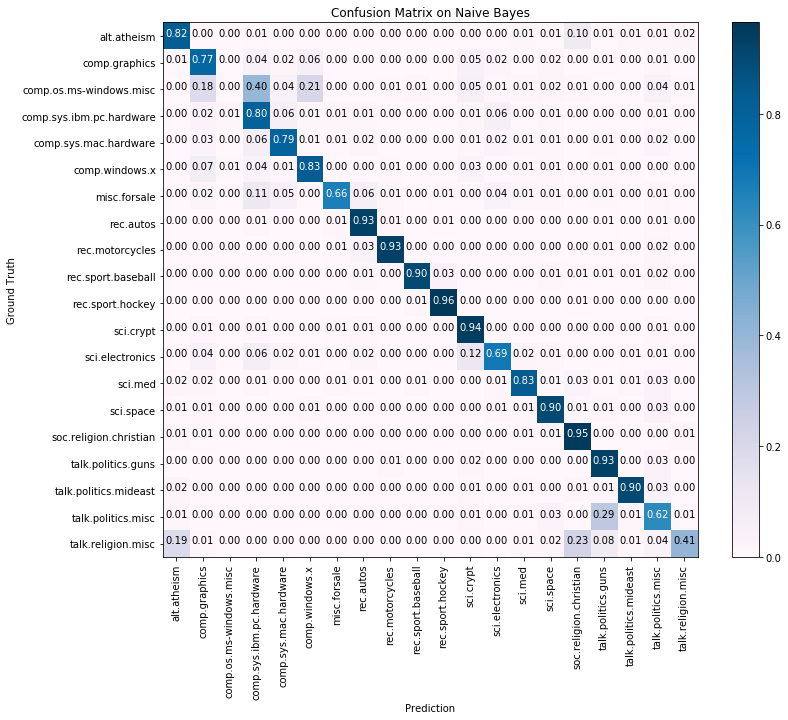

In [20]:
# Compute confusion matrix
cma = confusion_matrix(test_labels, prediction, labels=None, sample_weight=None)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 10), facecolor='w', edgecolor='b')
plot_confusion_matrix(cma, classes=newsgroups_test.target_names,
                      title='Confusion Matrix on Naive Bayes')
plt.savefig('NB.png')